**TASK -1**   
**Cat and Dog Image Classifier**

Develop an image classification model to distinguish between images of cats and dogs using data science techniques in Python.

In [1]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [18]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [6]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 79s 110ms/step - loss: 1.3020 - accuracy: 0.5597 - val_loss: 0.7035 - val_accuracy: 0.5868
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6523 - accuracy: 0.6226 - val_loss: 0.6323 - val_accuracy: 0.6238
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5551 - accuracy: 0.6988 - val_loss: 0.5232 - val_accuracy: 0.7478
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4923 - accuracy: 0.7463 - val_loss: 0.4948 - val_accuracy: 0.7656
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4267 - accuracy: 0.7804 - val_loss: 0.5673 - val_accuracy: 0.7264
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3937 - accuracy: 0.7976 - val_loss: 0.5183 - val_accuracy: 0.7710
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3554 - accuracy: 0.8170 - val_loss: 0.5459 - val_ac

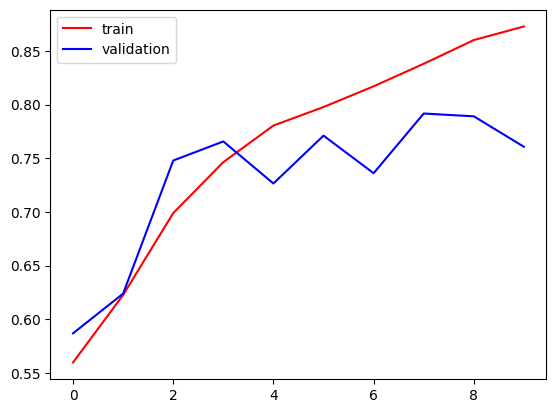

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

form training accuracy.validation accuracy & training loss,validation loss graph their is overfiting.

**ways to reduce overfitting**

**L1/L2 Regularizer**

**Dropout**

**Batch Norm **

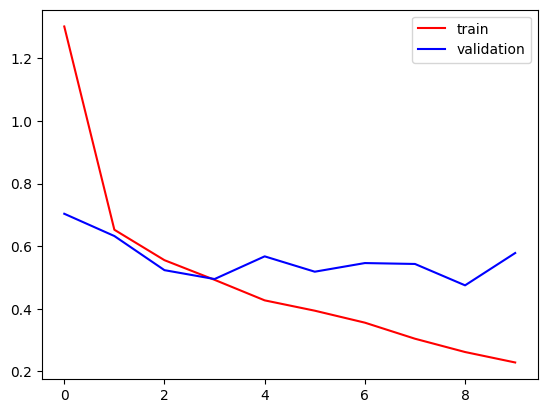

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
import cv2

In [16]:
test_img = cv2.imread('/content/dog.jpg')

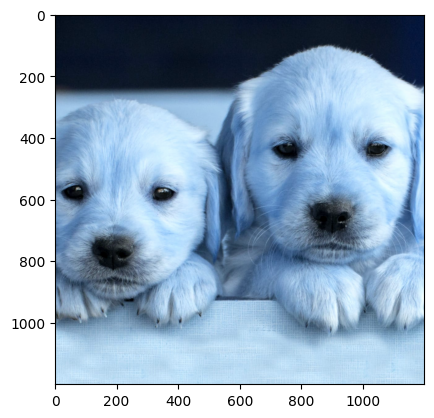

In [22]:
plt.imshow(test_img)

In [23]:
test_img.shape

(1200, 1200, 3)

In [24]:

test_img = cv2.resize(test_img,(256,256))

In [25]:
test_input = test_img.reshape((1,256,256,3))

In [26]:
model.predict(test_input)

1/1 [==============================] - 1s 619ms/step


array([[0.]], dtype=float32)

In [27]:
import cv2

In [28]:
test_img = cv2.imread('/content/CAT.jpg')

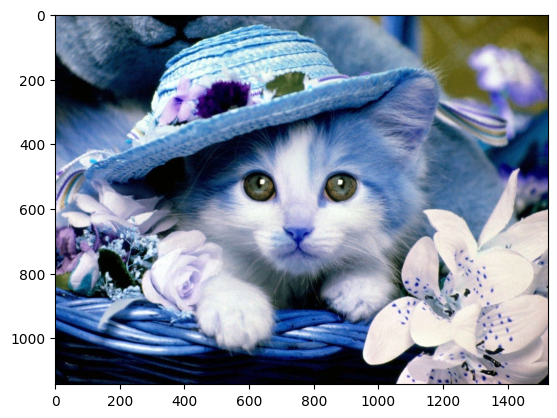

In [29]:
plt.imshow(test_img)

In [30]:
test_img.shape

(1143, 1524, 3)

In [32]:
test_img = cv2.resize(test_img,(256,256))

In [33]:
model.predict(test_input)

1/1 [==============================] - 0s 31ms/step


array([[0.]], dtype=float32)

**As you can see where the output is 0 is a cat and output 1 is a dog as per the input .**